## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

From the data analysis below, we can conclude three observations of the Pymaceuticals tests:

(1) The first observation is about the gender of the test mice. As the pie graph shows, the test gender almost distribute equally for male and female mice. Therefore, gender should not have a large impact on the test results.

(2) The second observation we can conclude is about the final tumor volume of each mouse across four regimens of interest. From the box plot, we can see that all four drug regimens do not have outliers. All the test results are within the reasonable range and there are no specific extreme test results within these four drug regimens. In addition, Propriva and Ceftamin are most effective drug specimens for controling tumor volumes.

(3) The third observation we can conclude is about the relationship between weight and tumor volume of capomulin regimen. The correlation between both factors is 0.95 which means a very positive correlation between these two factors. When the weight increases, the tumor volume increases as well. From the linear regression model, we can see that all the points are close to the linear fit line as well which means the two factors have a relationship very close to a linear relationship. 

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#combine two sheets into one sheets
rawdata=pd.merge(mouse_metadata,study_results,on="Mouse ID")

#calculate stats results for each drug regimen
mean=rawdata.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median=rawdata.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance=rawdata.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
SD=rawdata.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
SEM=rawdata.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

#create a dataframe of the results
data=pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Standard Deviation":SD,"SEM":SEM})
data


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

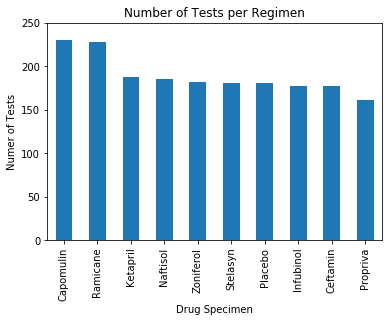

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#get counts of each drug regimen
count=rawdata["Drug Regimen"].value_counts()

#create the bar plot
graph=count.plot(kind='bar')
graph.set_title("Number of Tests per Regimen")
graph.set_xlabel('Drug Specimen')
graph.set_ylabel('Numer of Tests')
graph.set_ylim(0,250)
plt.show()



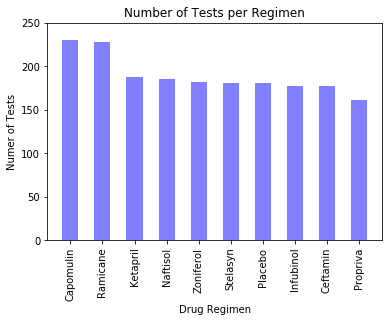

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#get counts of each drug specimen
count=rawdata["Drug Regimen"].value_counts()

#create result dataframe 
drug=pd.DataFrame(data=count)
drug_revise=drug.reset_index()
drug_final=drug_revise.rename(columns={"index":"Drug Regimen","Drug Regimen":"Count"})

#get x axis and y axis values
x_name=drug_final["Drug Regimen"]
y_name=drug_final["Count"]

#plot the bar graph
plt.bar(x_name,y_name,color='b',alpha=0.5,width=0.5,align="center")
plt.xticks(rotation="vertical")
plt.title("Number of Tests per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Numer of Tests")
plt.ylim(0,250)
plt.show()


## Pie plots

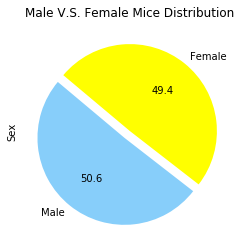

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#get count of each gender
num=rawdata["Sex"].value_counts()

#create the pir graph
graph_pie=num.plot(kind='pie',autopct='%.1f',colors=['lightskyblue','yellow'],startangle=140,explode=[0.1,0])
graph_pie.set_title("Male V.S. Female Mice Distribution")
plt.show()


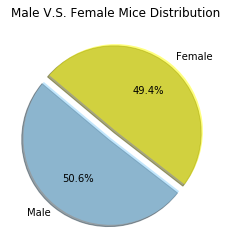

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#get counts of each gender
num=rawdata["Sex"].value_counts()

#create result datafram
pie_data=pd.DataFrame(data=num)
pie_data_revise=pie_data.reset_index()
pie_data_final=pie_data_revise.rename(columns={"index":"Sex","Sex":"Count"})
count=pie_data_final["Count"]
sex=pie_data_final["Sex"]
color=["lightskyblue","yellow"]

#plot pie graph
plt.pie(count,labels=sex,colors=color,autopct="%1.1f%%",shadow=True,startangle=140,wedgeprops={'alpha':0.5},explode=[0.1,0])
plt.title("Male V.S. Female Mice Distribution")
plt.show()

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#get counts of metastatic drugs and find the number of healthy mice for each drug regimen
count=rawdata.groupby(['Drug Regimen','Metastatic Sites'])["Metastatic Sites"].count()
df=pd.DataFrame(data=count)
rename=df.rename(columns={"Metastatic Sites":"Count"})
reset=rename.reset_index()
find=reset.loc[reset["Metastatic Sites"]==0]
drop=find.drop(columns=['Metastatic Sites'])
result=drop.set_index("Drug Regimen")
result["Count"].sort_values(ascending=True)

#get information about Placebo
placebo=rawdata.loc[rawdata["Drug Regimen"]=="Placebo"]
placebo_maxtime=placebo.groupby('Mouse ID')["Timepoint"].max()
new_placebo=pd.merge(placebo_maxtime,rawdata,on=("Mouse ID","Timepoint"),how="left")
final_placebo=new_placebo[["Mouse ID","Timepoint","Tumor Volume (mm3)"]].set_index('Mouse ID')
print(final_placebo)

#calculate placebo quartile information
placebo_quartiles = final_placebo["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
placebo_lowerq = placebo_quartiles[0.25]
placebo_upperq = placebo_quartiles[0.75]
placebo_iqr = placebo_upperq-placebo_lowerq
placebo_lower_bound = placebo_lowerq - (1.5*placebo_iqr)
placebo_upper_bound = placebo_upperq + (1.5*placebo_iqr)

print(f"The lower quartile of Tumor Volume (mm3) of Placebo is: {placebo_lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) of Placebo is: {placebo_upperq}")
print(f"The interquartile range of Tumor Volume (mm3) of Placebo is: {placebo_iqr}")
print(f"Values below {placebo_lower_bound} could be outliers.")
print(f"Values above {placebo_upper_bound} could be outliers.")

#find potential outleirs
outlier_placebo=final_placebo.loc[(final_placebo["Tumor Volume (mm3)"]<placebo_lower_bound)|(final_placebo["Tumor Volume (mm3)"]>placebo_upper_bound)]
outlier_placebo

          Timepoint  Tumor Volume (mm3)
Mouse ID                               
a262             45           70.717621
a897             45           72.255963
c282             45           65.815165
c757             45           69.042841
c766             45           69.823146
e227             45           73.212939
i477             10           47.520632
i669             25           53.303185
j235             20           52.942902
l872              0           45.000000
n763             40           58.011146
o302             30           62.030594
o795             45           73.059454
q582             35           53.713158
q787             45           66.096475
r850             15           50.218605
s152             25           64.119142
s166             10           49.000125
t718             45           63.423695
t994             20           56.527952
v409             10           50.649038
v989             10           52.614689
w167             35           68.134288


,Timepoint,Tumor Volume (mm3)
Mouse ID,,


In [8]:
#get information about propriva
propriva=rawdata.loc[rawdata["Drug Regimen"]=="Propriva"]
propriva_maxtime=propriva.groupby('Mouse ID')["Timepoint"].max()
new_propriva=pd.merge(propriva_maxtime,rawdata,on=("Mouse ID","Timepoint"),how="left")
final_propriva=new_propriva[["Mouse ID","Timepoint","Tumor Volume (mm3)"]].set_index('Mouse ID')
print(final_propriva)

#calculate quartile of propriva
propriva_quartiles = final_propriva["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
propriva_lowerq = propriva_quartiles[0.25]
propriva_upperq = propriva_quartiles[0.75]
propriva_iqr = propriva_upperq-propriva_lowerq
propriva_lower_bound = propriva_lowerq - (1.5*propriva_iqr)
propriva_upper_bound = propriva_upperq + (1.5*propriva_iqr)

print(f"The lower quartile of Tumor Volume (mm3) of Propriva is: {propriva_lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) of Propriva is: {propriva_upperq}")
print(f"The interquartile range of Tumor Volume (mm3) of Propriva is: {propriva_iqr}")
print(f"Values below {propriva_lower_bound} could be outliers.")
print(f"Values above {propriva_upper_bound} could be outliers.")

#find potential outliers
outlier_propriva=final_propriva.loc[(final_propriva["Tumor Volume (mm3)"]<propriva_lower_bound)|(final_propriva["Tumor Volume (mm3)"]>propriva_upper_bound)]
outlier_propriva

          Timepoint  Tumor Volume (mm3)
Mouse ID                               
a699             45           62.191414
c927             40           64.183229
g558             40           61.774963
g570             45           70.492788
g989             35           62.570880
i635             45           58.633404
k603             20           50.180109
l215             10           53.653970
n482              0           45.000000
n630              5           46.099100
n678             10           49.145709
o523             10           47.081086
o562             45           72.455421
p310             25           55.341834
r107             30           58.406473
s141             30           55.841410
s187             30           60.008783
t198             45           64.911363
u946             20           49.110050
v991             45           70.167749
w350             45           64.957562
w746              5           49.453270
x111             10           49.122969


,Timepoint,Tumor Volume (mm3)
Mouse ID,,


In [15]:
#get information about zoniferol
zoniferol=rawdata.loc[rawdata["Drug Regimen"]=="Zoniferol"]
zoniferol_maxtime=zoniferol.groupby('Mouse ID')["Timepoint"].max()
new_zoniferol=pd.merge(zoniferol_maxtime,rawdata,on=("Mouse ID","Timepoint"),how="left")
final_zoniferol=new_zoniferol[["Mouse ID","Timepoint","Tumor Volume (mm3)"]].set_index('Mouse ID')
print(final_zoniferol)

#calculate quartile of zoniferol
zoniferol_quartiles = final_zoniferol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
zoniferol_lowerq = zoniferol_quartiles[0.25]
zoniferol_upperq = zoniferol_quartiles[0.75]
zoniferol_iqr = zoniferol_upperq-zoniferol_lowerq
zoniferol_lower_bound = zoniferol_lowerq - (1.5*zoniferol_iqr)
zoniferol_upper_bound = zoniferol_upperq + (1.5*zoniferol_iqr)

print(f"The lower quartile of Tumor Volume (mm3) of Zoniferol is: {zoniferol_lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) of Zoniferol is: {zoniferol_upperq}")
print(f"The interquartile range of Tumor Volume (mm3) of Zoniferol is: {zoniferol_iqr}")
print(f"Values below {zoniferol_lower_bound} could be outliers.")
print(f"Values above {zoniferol_upper_bound} could be outliers.")

#find potential outliers
outlier_zoniferol=final_zoniferol.loc[(final_zoniferol["Tumor Volume (mm3)"]<zoniferol_lower_bound)|(final_zoniferol["Tumor Volume (mm3)"]>zoniferol_upper_bound)]
outlier_zoniferol

          Timepoint  Tumor Volume (mm3)
Mouse ID                               
a401             45           66.794156
a788             30           60.413709
b313             25           55.745146
c264             45           67.942121
c302             45           64.575222
c559             45           61.840058
d133              0           45.000000
d164             10           47.474645
f129             15           49.988302
f394              5           47.033100
f545             45           73.324432
g296             45           68.163195
j365             45           64.294085
k754             20           52.693423
k894             45           60.752704
m331             15           52.110088
n967             15           49.825004
o926             45           62.327966
p136             45           63.488697
q511             45           68.611061
q633             45           70.827796
s337             45           62.109651
w140              5           47.717952


,Timepoint,Tumor Volume (mm3)
Mouse ID,,


In [12]:
#get ceftamin information
ceftamin=rawdata.loc[rawdata["Drug Regimen"]=="Ceftamin"]
ceftamin_maxtime=ceftamin.groupby('Mouse ID')["Timepoint"].max()
new_ceftamin=pd.merge(ceftamin_maxtime,rawdata,on=("Mouse ID","Timepoint"),how="left")
final_ceftamin=new_ceftamin[["Mouse ID","Timepoint","Tumor Volume (mm3)"]].set_index('Mouse ID')
print(final_ceftamin)

#calculate quartile of ceftamin
ceftamin_quartiles = final_ceftamin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"The lower quartile of Tumor Volume (mm3) of Ceftamin is: {ceftamin_lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) of Ceftamin is: {ceftamin_upperq}")
print(f"The interquartile range of Tumor Volume (mm3) of Ceftamin is: {ceftamin_iqr}")
print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

#find potential outlier
outlier_ceftamin=final_ceftamin.loc[(final_ceftamin["Tumor Volume (mm3)"]<ceftamin_lower_bound)|(final_ceftamin["Tumor Volume (mm3)"]>ceftamin_upper_bound)]
outlier_ceftamin

          Timepoint  Tumor Volume (mm3)
Mouse ID                               
a275             45           62.999356
b447              0           45.000000
b487             25           56.057749
b759             30           55.742829
f436             15           48.722078
h531              5           47.784682
j296             45           61.849023
k210             45           68.923185
l471             45           67.748662
l490             30           57.918381
l558             10           46.784535
l661             45           59.851956
l733             45           64.299830
o287             45           59.741901
p438             45           61.433892
q483             40           64.192341
t573              0           45.000000
u149             25           52.925348
u153              0           45.000000
w151             45           67.527482
x226              0           45.000000
x581             45           64.634949
x822             45           61.386660


,Timepoint,Tumor Volume (mm3)
Mouse ID,,


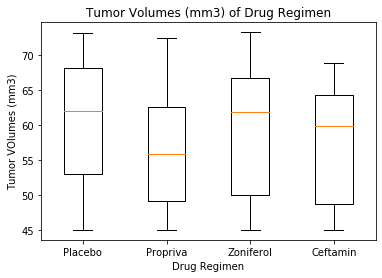

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#get counts of metastatic drugs and find the number of healthy mice for each drug regimen
count=rawdata.groupby(['Drug Regimen','Metastatic Sites'])["Metastatic Sites"].count()
df=pd.DataFrame(data=count)
rename=df.rename(columns={"Metastatic Sites":"Count"})
reset=rename.reset_index()
find=reset.loc[reset["Metastatic Sites"]==0]
drop=find.drop(columns=['Metastatic Sites'])
result=drop.set_index("Drug Regimen")
result["Count"].sort_values(ascending=True)

#get information of each drug regimen
placebo=rawdata.loc[rawdata["Drug Regimen"]=="Placebo"]
propriva=rawdata.loc[rawdata["Drug Regimen"]=="Propriva"]
zoniferol=rawdata.loc[rawdata["Drug Regimen"]=="Zoniferol"]
ceftamin=rawdata.loc[rawdata["Drug Regimen"]=="Ceftamin"]

#find the max timepoint of each drug regimen
placebo_maxtime=placebo.groupby('Mouse ID')["Timepoint"].max()
propriva_maxtime=propriva.groupby('Mouse ID')["Timepoint"].max()
zoniferol_maxtime=zoniferol.groupby('Mouse ID')["Timepoint"].max()
ceftamin_maxtime=ceftamin.groupby('Mouse ID')["Timepoint"].max()

#get tumor volume information for each drug regimen
new_placebo=pd.merge(placebo_maxtime,rawdata,on=("Mouse ID","Timepoint"),how="left")
final_placebo=new_placebo[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

new_propriva=pd.merge(propriva_maxtime,rawdata,on=("Mouse ID","Timepoint"),how="left")
final_propriva=new_propriva[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

new_zoniferol=pd.merge(zoniferol_maxtime,rawdata,on=("Mouse ID","Timepoint"),how="left")
final_zoniferol=new_zoniferol[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

new_ceftamin=pd.merge(ceftamin_maxtime,rawdata,on=("Mouse ID","Timepoint"),how="left")
final_ceftamin=new_ceftamin[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

#plot box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes (mm3) of Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor VOlumes (mm3)')
ax1.boxplot([final_placebo["Tumor Volume (mm3)"],final_propriva["Tumor Volume (mm3)"],final_zoniferol["Tumor Volume (mm3)"],final_ceftamin["Tumor Volume (mm3)"]],labels=["Placebo","Propriva","Zoniferol","Ceftamin"])
plt.show()


## Line and scatter plots

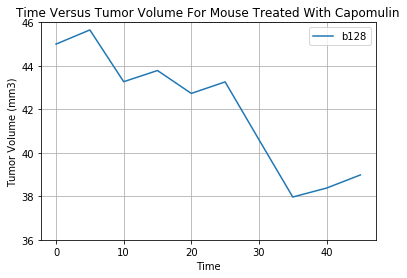

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#filter rawdata to get information of timepoint, mouse ID, tumor volume and drug regimen
data=rawdata.groupby(['Mouse ID','Tumor Volume (mm3)','Drug Regimen'])["Timepoint"].unique().sort_values(ascending=True)

#find information about a specific mouse ID in Capomulin regimen
new_table=pd.DataFrame(data=data)
revise=new_table.reset_index()
final=revise.loc[revise["Drug Regimen"]=="Capomulin"]
mouse=final.loc[final["Mouse ID"]=="b128"]

#plot line graph
time=mouse["Timepoint"]
volume=mouse["Tumor Volume (mm3)"]
plt.plot(time,volume)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Time Versus Tumor Volume For Mouse Treated With Capomulin")
plt.ylim(36,46)
plt.legend(['b128'],loc="best")
plt.grid()
plt.show()


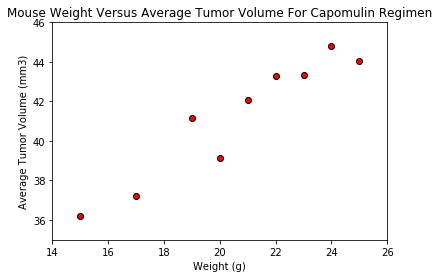

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#filter rawdata to get information of weight and tumor volume within Capomulin regimen
first=rawdata.groupby(['Drug Regimen','Weight (g)'])["Tumor Volume (mm3)"].mean()
revise=first.reset_index()
final=revise.loc[revise["Drug Regimen"]=="Capomulin"]
weight=final["Weight (g)"]
volume=final["Tumor Volume (mm3)"]

#plot scatter plot
plt.scatter(weight,volume,marker="o",facecolors="red",edgecolors="black")
plt.title("Mouse Weight Versus Average Tumor Volume For Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(35,46)
plt.show()


The correlation between both factors is 0.95


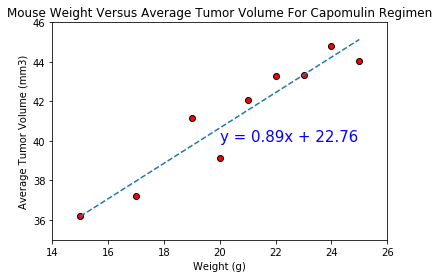

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats as st

#calculate correlation between weight and tumor volume
correlation=st.pearsonr(final["Weight (g)"],final["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

weight=final["Weight (g)"]
volume=final["Tumor Volume (mm3)"]

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
fit = slope * weight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter graph
plt.scatter(weight,volume,marker="o",facecolors="red",edgecolors="black")
plt.title("Mouse Weight Versus Average Tumor Volume For Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(35,46)

#plot linear fit line
plt.plot(weight,fit,"--")
plt.annotate(line_eq,(20,40),fontsize=15,color="blue")

plt.show()

